In [1]:
import pandas as pd
import psycopg2
import numpy as np
import missingno as msno
import os
import re

In [2]:
pd.set_option("display.max_rows",None,"display.max_columns",None)

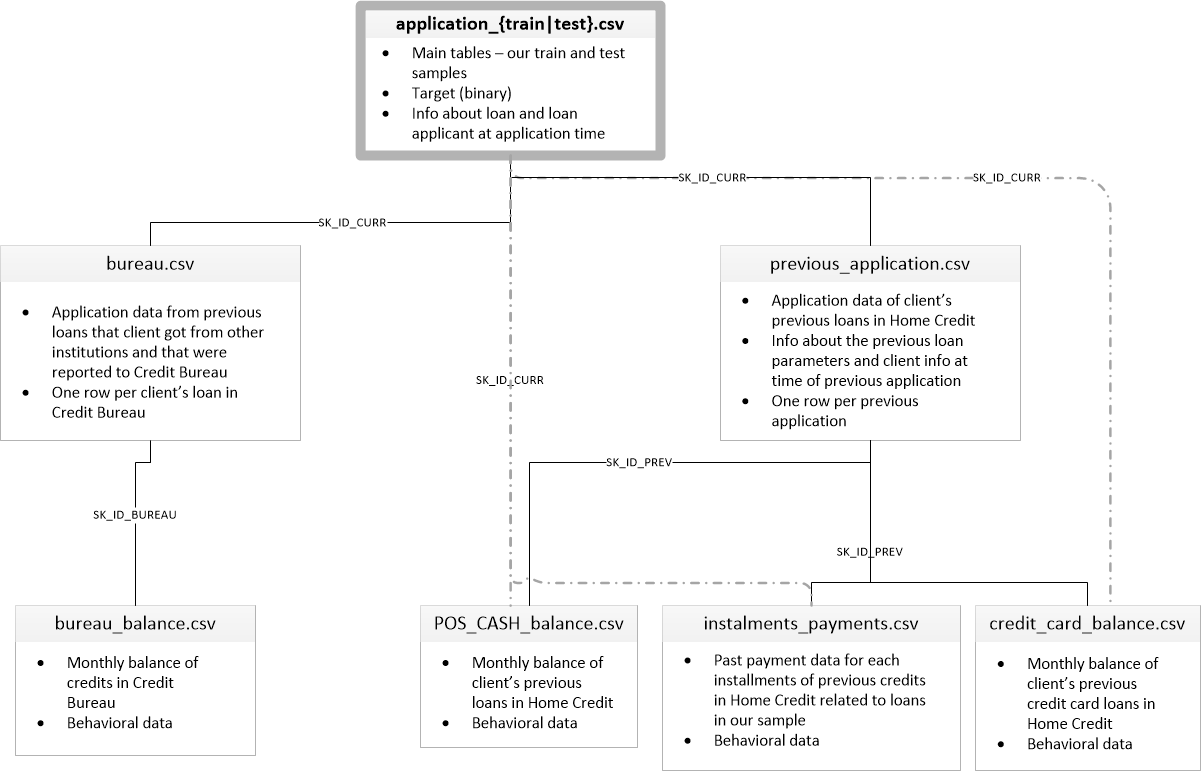

In [3]:
from IPython.display import Image
Image('home_credit.png')


In [4]:
#fungsi untuk listing file
def listfiles():
    path = 'homecredit_dataset/'
    files = []
    # r=root, d=directories, f = files
    for r, d, f in os.walk(path):
        for file in f:
            if '.csv' in file:
                files.append(os.path.join(file))
    for f in files:
        if f not in ['HomeCredit_columns_description.csv','sample_submission.csv']:
            print(f.split(".")[0].lower())
            exec("%s = pd.read_csv('%s')" % (f.split(".")[0].lower(),path+f),globals())
    
#     return files, path

In [5]:
#fungsi untuk mengecek kolom dengan suffix
def cek_suffixes(tabel,suff1,suff2):
    lst = []
    for i in tabel.columns:
        if (suff1 in i) or (suff2 in i):
            lst.append('_'.join(i.split('_')[:-1]))
    return list(set(lst))

In [41]:
#fungsi untuk mengecek value
def merge_twincolumn(tabel,col1,col2):
    temp=[]
    for i in range(len(x)):
        if (tabel[col1].isna()[i] == True) and (tabel[col2].isna()[i]  == False):
            temp.append(tabel[col2][i])
        elif (tabel[col1].isna()[i] == False) and (tabel[col2].isna()[i]==True):
            temp.append(tabel[col1][i])
        elif (tabel[col1].isna()[i] == True) and (tabel[col2].isna()[i]==True):
            temp.append(tabel[col1[i]])
    return temp
# y['gabungan'] = temp

In [7]:
listfiles()

application_test
application_train
bureau
bureau_balance
credit_card_balance
installments_payments
pos_cash_balance
previous_application


In [8]:
application_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

### Random n data dari tabel  installments payments

In [9]:
#variabel penampung jumlah row yang akan diambil
nrows = 1000

In [10]:
install_payment = installments_payments.sample(n=nrows,random_state=2,replace=False)

In [11]:
install_payment.head()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  \
8356044      2685806      322451                     0.0   
9850434      1633870      320725                     1.0   
3869739      2144612      268522                     0.0   
3990839      2177153      229194                     2.0   
12924307     2785430      429514                     1.0   

          NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
8356044                       6          -2901.0             -2908.0   
9850434                      15           -320.0              -322.0   
3869739                      24          -2798.0             -2809.0   
3990839                       4           -264.0              -292.0   
12924307                      3          -2667.0             -2666.0   

          AMT_INSTALMENT  AMT_PAYMENT  
8356044         3375.000     3375.000  
9850434        23641.605    23641.605  
3869739         8100.000     8100.000  
3990839        25195.815    25195.815  
12924307        5924.295     5899.095

In [12]:
#cek berapa jumlah data yg unik dari setiap kolom
install_payment.nunique()

SK_ID_PREV                1000
SK_ID_CURR                 999
NUM_INSTALMENT_VERSION       9
NUM_INSTALMENT_NUMBER      101
DAYS_INSTALMENT            819
DAYS_ENTRY_PAYMENT         799
AMT_INSTALMENT             902
AMT_PAYMENT                907
dtype: int64

In [13]:
#cek apakah ada nilai null pada tiap kolom 
install_payment.isnull().sum()

SK_ID_PREV                0
SK_ID_CURR                0
NUM_INSTALMENT_VERSION    0
NUM_INSTALMENT_NUMBER     0
DAYS_INSTALMENT           0
DAYS_ENTRY_PAYMENT        0
AMT_INSTALMENT            0
AMT_PAYMENT               0
dtype: int64

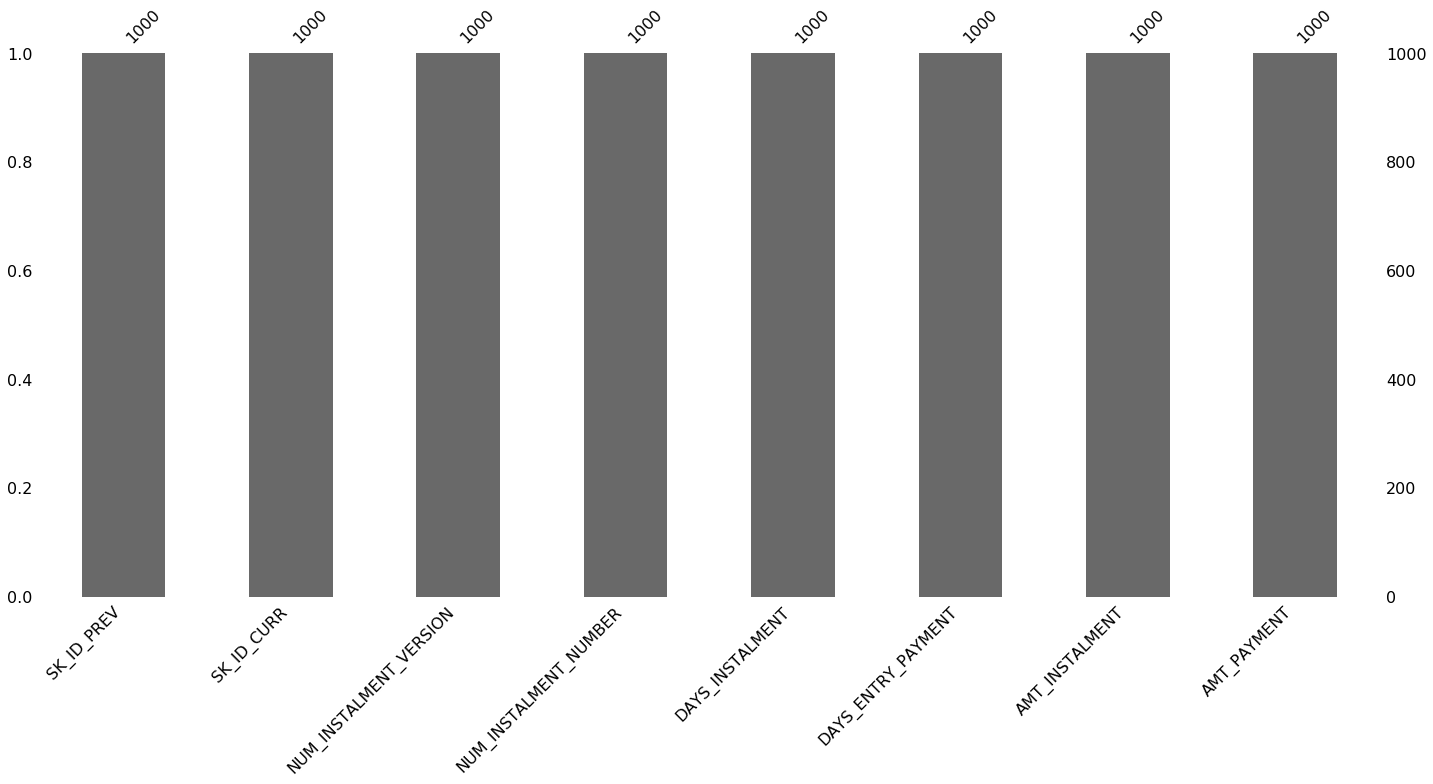

In [14]:
#visualisasi missing value dari df install_payment
msno.bar(install_payment)

### filter data credit card balance (CCB) berdasarkan sk_id_prev pada df install_payment

In [15]:
ccb_filter = credit_card_balance[credit_card_balance['SK_ID_PREV'].isin(install_payment['SK_ID_PREV'])]
ccb_filter.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
316      2538976      450633              -5   132350.085   
459      1958875      383414              -6   278010.405   
905      1185177      359242              -5        0.000   
960      1051692      336861              -3        0.000   
1325     2273297      224843              -7        0.000   

      AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
316                    180000                       0.0              5763.285   
459                    270000                       0.0              8105.580   
905                         0                       0.0                 0.000   
960                         0                       0.0                 0.000   
1325                    45000                       0.0                 0.000   

      AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
316                          0.0                  5763.285   
459                          0.0                  8105.580   
905                          0.0                     0.000   
960                          0.0                     0.000   
1325                         0.0                     0.000   

      AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
316                  6843.735            13788.000                    13788.0   
459                 13500.000            13500.000                    13500.0   
905                     0.000              226.845                        0.0   
960                     0.000              184.500                      184.5   
1325                    0.000              572.985                        0.0   

      AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
316                 128850.300     132350.085            132350.085   
459                 265967.145     275606.955            275606.955   
905                      0.000          0.000                 0.000   
960                      0.000          0.000                 0.000   
1325                     0.000          0.000                 0.000   

      CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  \
316                        0.0                     2   
459                        0.0                     3   
905                        0.0                     0   
960                        0.0                     0   
1325                       0.0                     0   

      CNT_DRAWINGS_OTHER_CURRENT  CNT_DRAWINGS_POS_CURRENT  \
316                          0.0                       2.0   
459                          0.0                       3.0   
905                          0.0                       0.0   
960                          0.0                       0.0   
1325                         0.0                       0.0   

      CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
316                        21.0               Active       0           0  
459                        39.0               Active       0           0  
905                        24.0               Active       0           0  
960                         2.0               Active       0           0  
1325                       39.0               Active       0           0

In [16]:
ccb_filter.shape

(17274, 23)

In [17]:
#melihat nilai yang unik dari setiap kolom pada df ccb
ccb_filter.nunique()

SK_ID_PREV                     286
SK_ID_CURR                     286
MONTHS_BALANCE                  96
AMT_BALANCE                   9180
AMT_CREDIT_LIMIT_ACTUAL         41
AMT_DRAWINGS_ATM_CURRENT       249
AMT_DRAWINGS_CURRENT          1301
AMT_DRAWINGS_OTHER_CURRENT      45
AMT_DRAWINGS_POS_CURRENT      1037
AMT_INST_MIN_REGULARITY       2313
AMT_PAYMENT_CURRENT           1808
AMT_PAYMENT_TOTAL_CURRENT     1542
AMT_RECEIVABLE_PRINCIPAL      8109
AMT_RECIVABLE                 9009
AMT_TOTAL_RECEIVABLE          9010
CNT_DRAWINGS_ATM_CURRENT        20
CNT_DRAWINGS_CURRENT            45
CNT_DRAWINGS_OTHER_CURRENT       3
CNT_DRAWINGS_POS_CURRENT        45
CNT_INSTALMENT_MATURE_CUM      108
NAME_CONTRACT_STATUS             4
SK_DPD                         172
SK_DPD_DEF                       9
dtype: int64

In [18]:
#cek apakah ada nilai null pada tiap kolom 
ccb_filter.isnull().sum()

SK_ID_PREV                      0
SK_ID_CURR                      0
MONTHS_BALANCE                  0
AMT_BALANCE                     0
AMT_CREDIT_LIMIT_ACTUAL         0
AMT_DRAWINGS_ATM_CURRENT      241
AMT_DRAWINGS_CURRENT            0
AMT_DRAWINGS_OTHER_CURRENT    241
AMT_DRAWINGS_POS_CURRENT      241
AMT_INST_MIN_REGULARITY       450
AMT_PAYMENT_CURRENT           251
AMT_PAYMENT_TOTAL_CURRENT       0
AMT_RECEIVABLE_PRINCIPAL        0
AMT_RECIVABLE                   0
AMT_TOTAL_RECEIVABLE            0
CNT_DRAWINGS_ATM_CURRENT      241
CNT_DRAWINGS_CURRENT            0
CNT_DRAWINGS_OTHER_CURRENT    241
CNT_DRAWINGS_POS_CURRENT      241
CNT_INSTALMENT_MATURE_CUM     450
NAME_CONTRACT_STATUS            0
SK_DPD                          0
SK_DPD_DEF                      0
dtype: int64

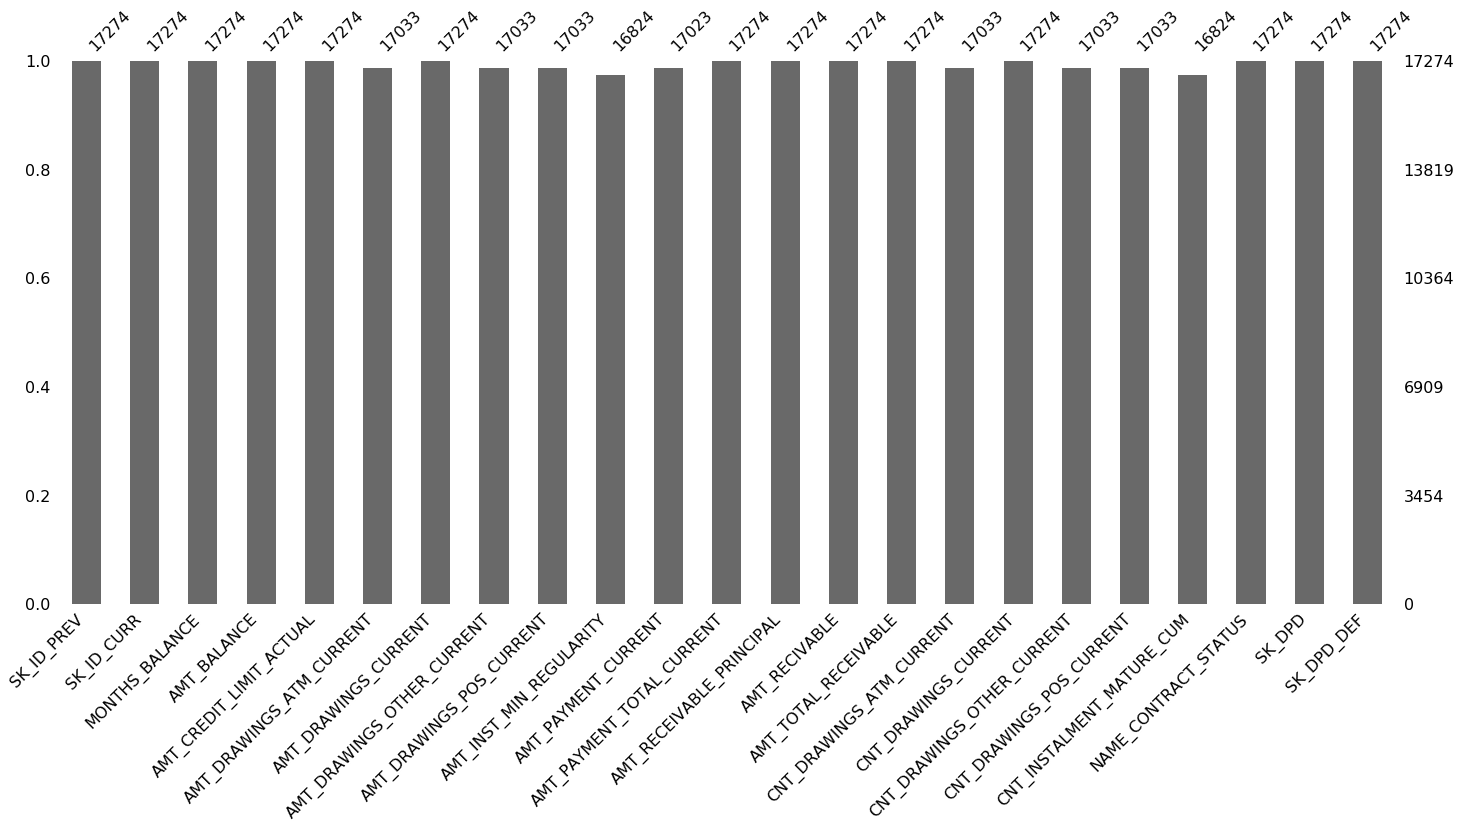

In [19]:
#visualisasi missing value
msno.bar(ccb_filter)

### filter data pos_cash_balance (pcb) berdasarkan sk_id_prev pada installment_payment

In [20]:
pcb_filter = pos_cash_balance[pos_cash_balance['SK_ID_PREV'].isin(install_payment['SK_ID_PREV'])]
pcb_filter.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
381      1220076      412570             -43            54.0   
1192     2241748      156201             -32            36.0   
1929     1468614      162012              -5            10.0   
2171     2379507      207464             -32            36.0   
2326     2796875      238927             -10            12.0   

      CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
381                    54.0               Active       0           0  
1192                   31.0               Active       0           0  
1929                    8.0               Active       0           0  
2171                   32.0               Active       0           0  
2326                    7.0               Active       0           0

In [21]:
pcb_filter.shape

(10109, 8)

In [22]:
pcb_filter.nunique()

SK_ID_PREV               714
SK_ID_CURR               713
MONTHS_BALANCE            96
CNT_INSTALMENT            39
CNT_INSTALMENT_FUTURE     61
NAME_CONTRACT_STATUS       6
SK_DPD                   132
SK_DPD_DEF                20
dtype: int64

In [23]:
#cek apakah ada nilai null pada tiap kolom 
pcb_filter.isnull().sum()

SK_ID_PREV                0
SK_ID_CURR                0
MONTHS_BALANCE            0
CNT_INSTALMENT           14
CNT_INSTALMENT_FUTURE    14
NAME_CONTRACT_STATUS      0
SK_DPD                    0
SK_DPD_DEF                0
dtype: int64

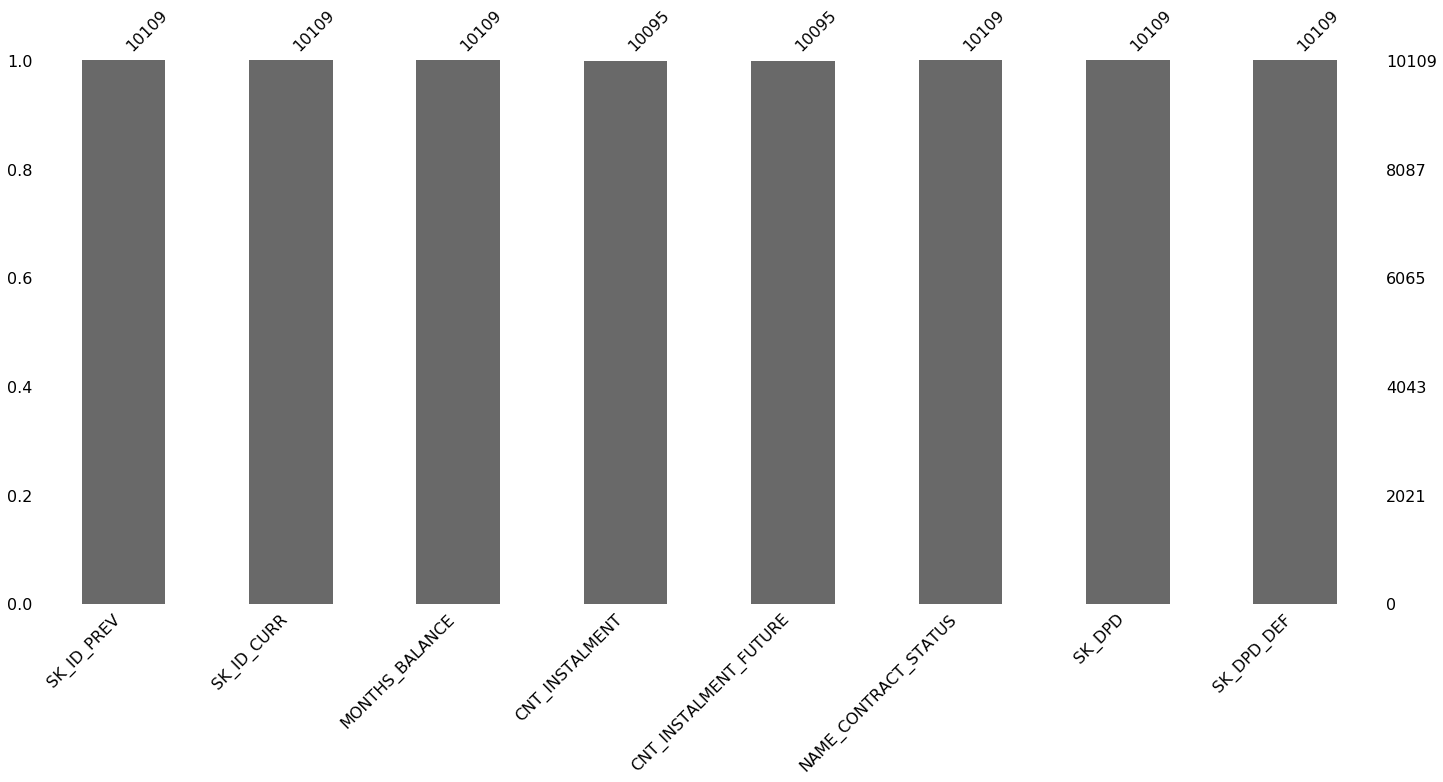

In [24]:
msno.bar(pcb_filter)

### merging df installments payment dan df ccb_filter

In [25]:
# pd.merge(install_paymnt,ccb_filter, on='SK_ID_PREV',)
ip_ccb = install_payment.merge(ccb_filter, on=('SK_ID_PREV','SK_ID_CURR'), how='left',suffixes=('_ip','_ccb'))

In [26]:
ip_ccb.head()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     2685806      322451                     0.0                      6   
1     2685806      322451                     0.0                      6   
2     2685806      322451                     0.0                      6   
3     2685806      322451                     0.0                      6   
4     2685806      322451                     0.0                      6   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  \
0          -2901.0             -2908.0          3375.0       3375.0   
1          -2901.0             -2908.0          3375.0       3375.0   
2          -2901.0             -2908.0          3375.0       3375.0   
3          -2901.0             -2908.0          3375.0       3375.0   
4          -2901.0             -2908.0          3375.0       3375.0   

   MONTHS_BALANCE  AMT_BALANCE  AMT_CREDIT_LIMIT_ACTUAL  \
0           -40.0   184145.175                 180000.0   
1            -7.0        0.000                      0.0   
2           -13.0        0.000                      0.0   
3           -14.0        0.000                      0.0   
4           -74.0   184901.220                 180000.0   

   AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                   0.0                         0.0   
1                       0.0                   0.0                         0.0   
2                       0.0                   0.0                         0.0   
3                       0.0                   0.0                         0.0   
4                    4950.0                4950.0                         0.0   

   AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  \
0                       0.0                   9000.0               9000.0   
1                       0.0                      0.0                 41.4   
2                       0.0                      0.0                 41.4   
3                       0.0                      0.0                 41.4   
4                       0.0                   9000.0               9000.0   

   AMT_PAYMENT_TOTAL_CURRENT  AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  \
0                     9000.0                178484.265     184145.175   
1                        0.0                     0.000          0.000   
2                        0.0                     0.000          0.000   
3                        0.0                     0.000          0.000   
4                     9000.0                178132.410     184901.220   

   AMT_TOTAL_RECEIVABLE  CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  \
0            184145.175                       0.0                   0.0   
1                 0.000                       0.0                   0.0   
2                 0.000                       0.0                   0.0   
3                 0.000                       0.0                   0.0   
4            184901.220                       2.0                   2.0   

   CNT_DRAWINGS_OTHER_CURRENT  CNT_DRAWINGS_POS_CURRENT  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   

   CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                       62.0               Active     0.0         0.0  
1                       85.0               Active     0.0         0.0  
2                       85.0               Active     0.0         0.0  
3                       85.0               Active     0.0         0.0  
4                       28.0               Active     0.0         0.0

In [27]:
ip_ccb.shape

(17988, 29)

In [28]:
#cek nilai unik pada data ip_ccb (hasil merging)
ip_ccb.nunique()

SK_ID_PREV                    1000
SK_ID_CURR                     999
NUM_INSTALMENT_VERSION           9
NUM_INSTALMENT_NUMBER          101
DAYS_INSTALMENT                819
DAYS_ENTRY_PAYMENT             799
AMT_INSTALMENT                 902
AMT_PAYMENT                    907
MONTHS_BALANCE                  96
AMT_BALANCE                   9180
AMT_CREDIT_LIMIT_ACTUAL         41
AMT_DRAWINGS_ATM_CURRENT       249
AMT_DRAWINGS_CURRENT          1301
AMT_DRAWINGS_OTHER_CURRENT      45
AMT_DRAWINGS_POS_CURRENT      1037
AMT_INST_MIN_REGULARITY       2313
AMT_PAYMENT_CURRENT           1808
AMT_PAYMENT_TOTAL_CURRENT     1542
AMT_RECEIVABLE_PRINCIPAL      8109
AMT_RECIVABLE                 9009
AMT_TOTAL_RECEIVABLE          9010
CNT_DRAWINGS_ATM_CURRENT        20
CNT_DRAWINGS_CURRENT            45
CNT_DRAWINGS_OTHER_CURRENT       3
CNT_DRAWINGS_POS_CURRENT        45
CNT_INSTALMENT_MATURE_CUM      108
NAME_CONTRACT_STATUS             4
SK_DPD                         172
SK_DPD_DEF          

In [29]:
#cek apakah ada nilai null pada setiap kolom ip_ccb
ip_ccb.isnull().sum()

SK_ID_PREV                       0
SK_ID_CURR                       0
NUM_INSTALMENT_VERSION           0
NUM_INSTALMENT_NUMBER            0
DAYS_INSTALMENT                  0
DAYS_ENTRY_PAYMENT               0
AMT_INSTALMENT                   0
AMT_PAYMENT                      0
MONTHS_BALANCE                 714
AMT_BALANCE                    714
AMT_CREDIT_LIMIT_ACTUAL        714
AMT_DRAWINGS_ATM_CURRENT       955
AMT_DRAWINGS_CURRENT           714
AMT_DRAWINGS_OTHER_CURRENT     955
AMT_DRAWINGS_POS_CURRENT       955
AMT_INST_MIN_REGULARITY       1164
AMT_PAYMENT_CURRENT            965
AMT_PAYMENT_TOTAL_CURRENT      714
AMT_RECEIVABLE_PRINCIPAL       714
AMT_RECIVABLE                  714
AMT_TOTAL_RECEIVABLE           714
CNT_DRAWINGS_ATM_CURRENT       955
CNT_DRAWINGS_CURRENT           714
CNT_DRAWINGS_OTHER_CURRENT     955
CNT_DRAWINGS_POS_CURRENT       955
CNT_INSTALMENT_MATURE_CUM     1164
NAME_CONTRACT_STATUS           714
SK_DPD                         714
SK_DPD_DEF          

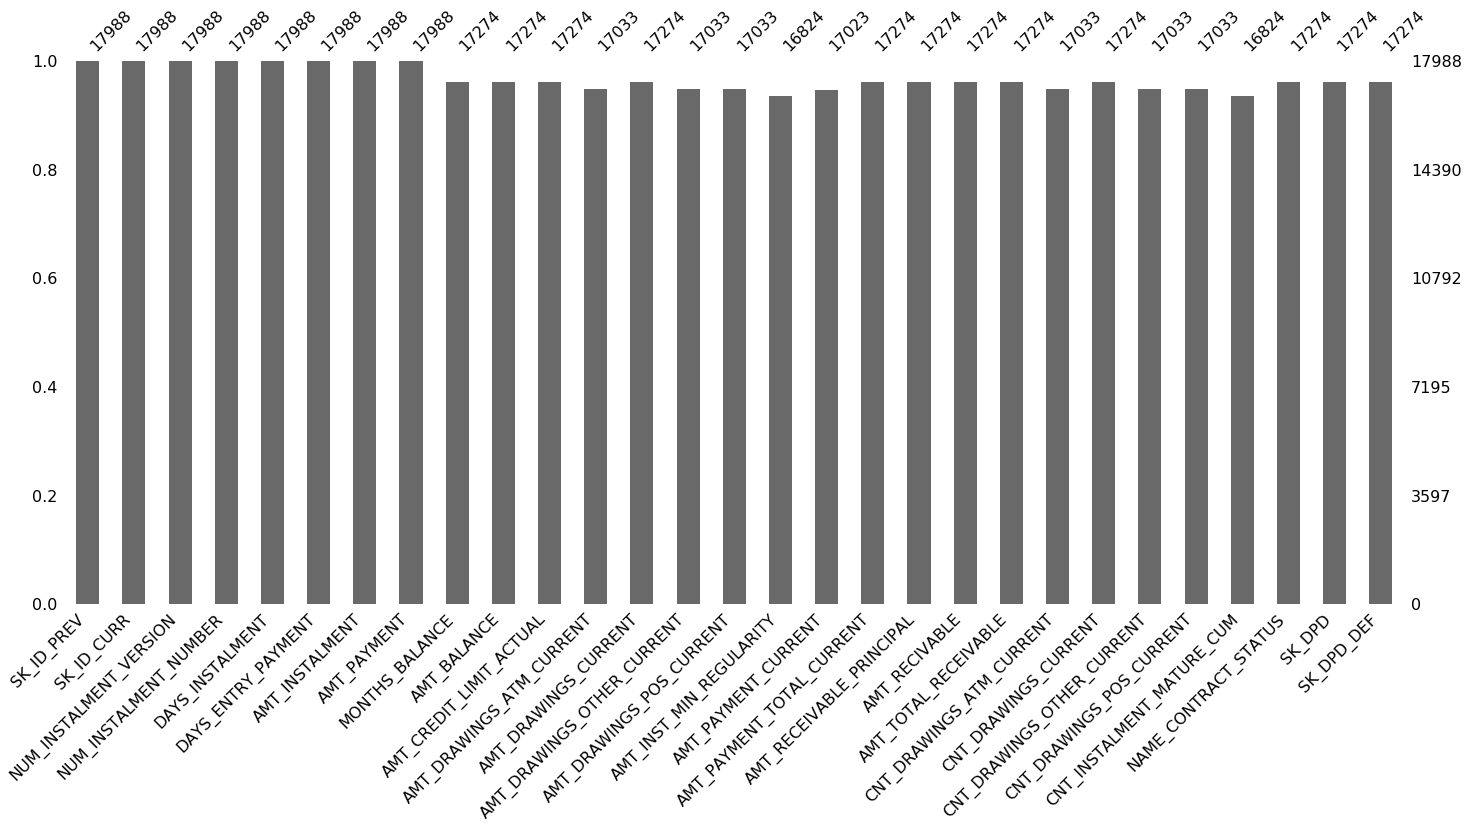

In [30]:
msno.bar(ip_ccb)

### Merging ip_ccb dengan pcb_filter

In [31]:
ipccb_pcb = ip_ccb.merge(pcb_filter, on=('SK_ID_PREV','SK_ID_CURR'), how='left',suffixes=('_ipccb','_pcb'))

In [32]:
ipccb_pcb.head()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     2685806      322451                     0.0                      6   
1     2685806      322451                     0.0                      6   
2     2685806      322451                     0.0                      6   
3     2685806      322451                     0.0                      6   
4     2685806      322451                     0.0                      6   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  \
0          -2901.0             -2908.0          3375.0       3375.0   
1          -2901.0             -2908.0          3375.0       3375.0   
2          -2901.0             -2908.0          3375.0       3375.0   
3          -2901.0             -2908.0          3375.0       3375.0   
4          -2901.0             -2908.0          3375.0       3375.0   

   MONTHS_BALANCE_ipccb  AMT_BALANCE  AMT_CREDIT_LIMIT_ACTUAL  \
0                 -40.0   184145.175                 180000.0   
1                  -7.0        0.000                      0.0   
2                 -13.0        0.000                      0.0   
3                 -14.0        0.000                      0.0   
4                 -74.0   184901.220                 180000.0   

   AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                   0.0                         0.0   
1                       0.0                   0.0                         0.0   
2                       0.0                   0.0                         0.0   
3                       0.0                   0.0                         0.0   
4                    4950.0                4950.0                         0.0   

   AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  \
0                       0.0                   9000.0               9000.0   
1                       0.0                      0.0                 41.4   
2                       0.0                      0.0                 41.4   
3                       0.0                      0.0                 41.4   
4                       0.0                   9000.0               9000.0   

   AMT_PAYMENT_TOTAL_CURRENT  AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  \
0                     9000.0                178484.265     184145.175   
1                        0.0                     0.000          0.000   
2                        0.0                     0.000          0.000   
3                        0.0                     0.000          0.000   
4                     9000.0                178132.410     184901.220   

   AMT_TOTAL_RECEIVABLE  CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  \
0            184145.175                       0.0                   0.0   
1                 0.000                       0.0                   0.0   
2                 0.000                       0.0                   0.0   
3                 0.000                       0.0                   0.0   
4            184901.220                       2.0                   2.0   

   CNT_DRAWINGS_OTHER_CURRENT  CNT_DRAWINGS_POS_CURRENT  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   

   CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS_ipccb  SK_DPD_ipccb  \
0                       62.0                     Active           0.0   
1                       85.0                     Active           0.0   
2                       85.0                     Active           0.0   
3                       85.0                     Active           0.0   
4                       28.0                     Active           0.0   

   SK_DPD_DEF_ipccb  MONTHS_BALANCE_pcb  CNT_INSTALMENT  \
0               0.0                

In [33]:
ipccb_pcb.shape

(27383, 35)

In [34]:
ipccb_pcb.nunique()

SK_ID_PREV                    1000
SK_ID_CURR                     999
NUM_INSTALMENT_VERSION           9
NUM_INSTALMENT_NUMBER          101
DAYS_INSTALMENT                819
DAYS_ENTRY_PAYMENT             799
AMT_INSTALMENT                 902
AMT_PAYMENT                    907
MONTHS_BALANCE_ipccb            96
AMT_BALANCE                   9180
AMT_CREDIT_LIMIT_ACTUAL         41
AMT_DRAWINGS_ATM_CURRENT       249
AMT_DRAWINGS_CURRENT          1301
AMT_DRAWINGS_OTHER_CURRENT      45
AMT_DRAWINGS_POS_CURRENT      1037
AMT_INST_MIN_REGULARITY       2313
AMT_PAYMENT_CURRENT           1808
AMT_PAYMENT_TOTAL_CURRENT     1542
AMT_RECEIVABLE_PRINCIPAL      8109
AMT_RECIVABLE                 9009
AMT_TOTAL_RECEIVABLE          9010
CNT_DRAWINGS_ATM_CURRENT        20
CNT_DRAWINGS_CURRENT            45
CNT_DRAWINGS_OTHER_CURRENT       3
CNT_DRAWINGS_POS_CURRENT        45
CNT_INSTALMENT_MATURE_CUM      108
NAME_CONTRACT_STATUS_ipccb       4
SK_DPD_ipccb                   172
SK_DPD_DEF_ipccb    

In [35]:
ipccb_pcb.isnull().sum()

SK_ID_PREV                        0
SK_ID_CURR                        0
NUM_INSTALMENT_VERSION            0
NUM_INSTALMENT_NUMBER             0
DAYS_INSTALMENT                   0
DAYS_ENTRY_PAYMENT                0
AMT_INSTALMENT                    0
AMT_PAYMENT                       0
MONTHS_BALANCE_ipccb          10109
AMT_BALANCE                   10109
AMT_CREDIT_LIMIT_ACTUAL       10109
AMT_DRAWINGS_ATM_CURRENT      10350
AMT_DRAWINGS_CURRENT          10109
AMT_DRAWINGS_OTHER_CURRENT    10350
AMT_DRAWINGS_POS_CURRENT      10350
AMT_INST_MIN_REGULARITY       10559
AMT_PAYMENT_CURRENT           10360
AMT_PAYMENT_TOTAL_CURRENT     10109
AMT_RECEIVABLE_PRINCIPAL      10109
AMT_RECIVABLE                 10109
AMT_TOTAL_RECEIVABLE          10109
CNT_DRAWINGS_ATM_CURRENT      10350
CNT_DRAWINGS_CURRENT          10109
CNT_DRAWINGS_OTHER_CURRENT    10350
CNT_DRAWINGS_POS_CURRENT      10350
CNT_INSTALMENT_MATURE_CUM     10559
NAME_CONTRACT_STATUS_ipccb    10109
SK_DPD_ipccb                

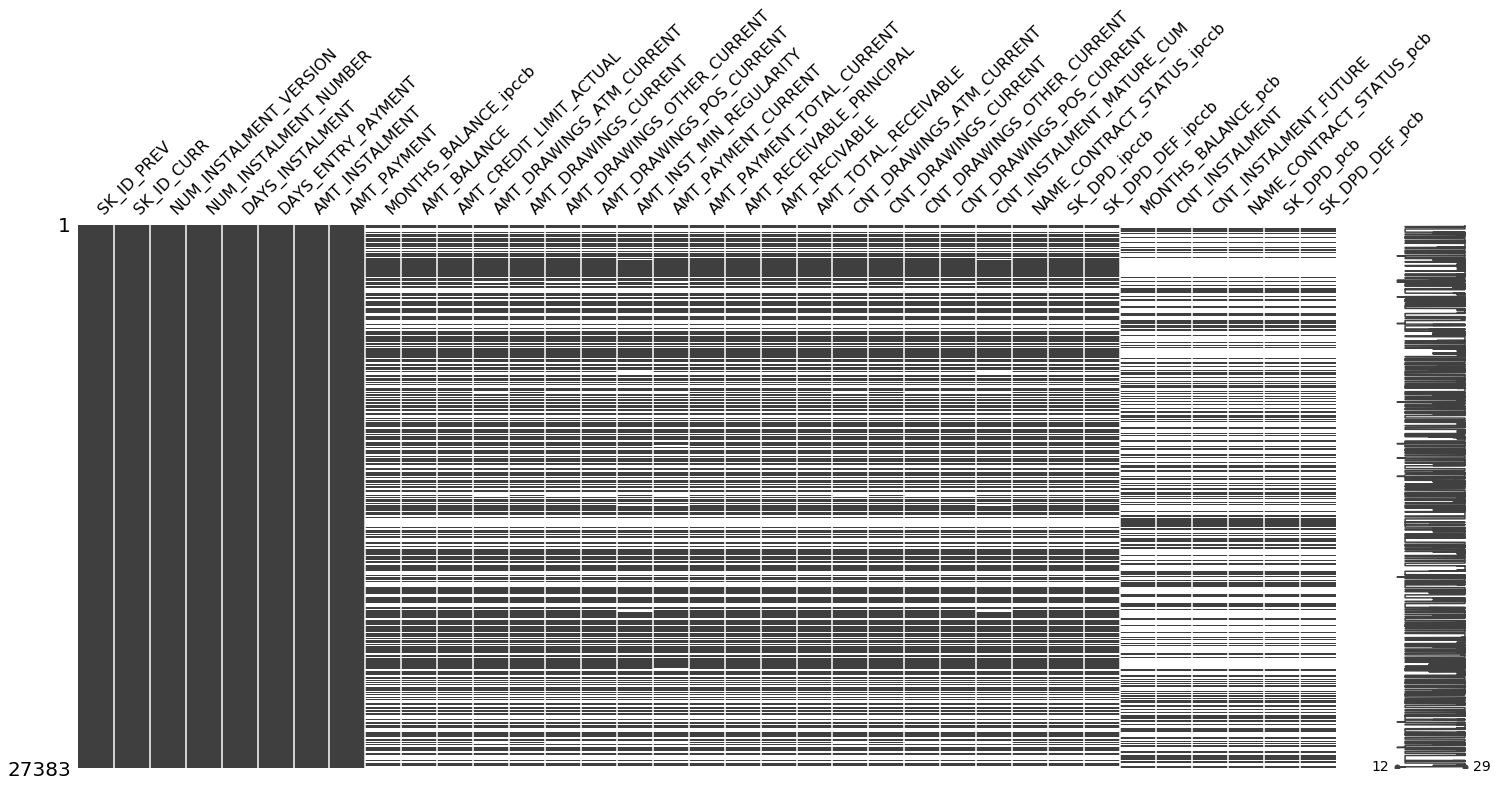

In [36]:
msno.matrix(ipccb_pcb)

In [38]:
# cek apakah ada kolom dengan suffix

        
cek_suffixes(ipccb_pcb,'_ipccb','_pcb')

['MONTHS_BALANCE', 'NAME_CONTRACT_STATUS', 'SK_DPD_DEF', 'SK_DPD']

In [47]:
#menyatukan kolom dengan suffix untuk dibandingkan
y = ipccb_pcb[['SK_DPD_pcb','SK_DPD_ipccb']]

In [48]:
y

SK_DPD_pcb  SK_DPD_ipccb
0             NaN           0.0
1             NaN           0.0
2             NaN           0.0
3             NaN           0.0
4             NaN           0.0
5             NaN           0.0
6             NaN           0.0
7             NaN           0.0
8             NaN           0.0
9             NaN           0.0
10            NaN           0.0
11            NaN           0.0
12            NaN           0.0
13            NaN           0.0
14            NaN           0.0
15            NaN           0.0
16            NaN           0.0
17            NaN           0.0
18            NaN           0.0
19            NaN           0.0
20            NaN           0.0
21            NaN           0.0
22            NaN           0.0
23            NaN           0.0
24            NaN           0.0
25            NaN           0.0
26            NaN           0.0
27            NaN           0.0
28            NaN           0.0
29            NaN           0.0
30            NaN           0.0
31            NaN           0.0
32            NaN           0.0
33            NaN           0.0
34            NaN           0.0
35            NaN           0.0
36            NaN           0.0
37            NaN           0.0
38            NaN           0.0
39            NaN           0.0
40            NaN           0.0
41            NaN           0.0
42            NaN           0.0
43            NaN           0.0
44            NaN           0.0
45            NaN           0.0
46            NaN           0.0
47            NaN           0.0
48            NaN           0.0
49            NaN           0.0
50            NaN           0.0
51            NaN           0.0
52            NaN           0.0
53            NaN           0.0
54            NaN           0.0
55            NaN           0.0
56            NaN           0.0
57            NaN           0.0
58            NaN           0.0
59            NaN           0.0
60            NaN           0.0
61            NaN           0.0
62            NaN           0.0
63            NaN           0.0
64            NaN           0.0
65            NaN           0.0
66            NaN           0.0
67            NaN           0.0
68            NaN           0.0
69            NaN           0.0
70            NaN           0.0
71            NaN           0.0
72            NaN           0.0
73            NaN           0.0
74            NaN           0.0
75            NaN           0.0
76            NaN           0.0
77            NaN           0.0
78            NaN           0.0
79            NaN           0.0
80            NaN           0.0
81            NaN           0.0
82            NaN           0.0
83            NaN           0.0
84            NaN           0.0
85            NaN           0.0
86            NaN           0.0
87            NaN           0.0
88            NaN           0.0
89            NaN           0.0
90            NaN           1.0
91            NaN           0.0
92            NaN           0.0
93            NaN           0.0
94            NaN           0.0
95            NaN           0.0
96            0.0           NaN
97            0.0           NaN
98            0.0           NaN
99            0.0           NaN
100           0.0           NaN
101           0.0           NaN
102           0.0           NaN
103           0.0           NaN
104           0.0           NaN
105           0.0           NaN
106           0.0           NaN
107           0.0           NaN
108           0.0           NaN
109           0.0           NaN
110           0.0           NaN
111           0.0           NaN
112           0.0           NaN
113           0.0           NaN
114           0.0           NaN
115           0.0           NaN
116           0.0           NaN
117           0.0           NaN
118           0.0           NaN
119           0.0           NaN
120           0.0           NaN
121           NaN           0.0
122           NaN           0.0
123           NaN           0.0
124    

In [49]:
len(y)

27383

In [50]:
#ada indikasi nilai pada sk_dpd saling mengisi, 
#cek apakah value pada SK_DPD_ipccb dan SK_DPD_pcb saling mengisi
y
count=0
for i in range(len(y)):
#     print(x['SK_DPD_pcb'].isna()[i],x['SK_DPD_ipccb'].isna())
    if y['SK_DPD_pcb'].isna()[i] != y['SK_DPD_ipccb'].isna()[i]:
        count+=1
print(count)

27383


In [51]:
#menyatukan kedua kolom tersebut ke sebuah kolom baru
count=0
temp=[]
# print(temp)
for i in range(len(x)):
    if (y['SK_DPD_pcb'].isna()[i] == True) and (y['SK_DPD_ipccb'].isna()[i]  == False):
        temp.append(x['SK_DPD_ipccb'][i])
    elif (y['SK_DPD_pcb'].isna()[i] == False) and (y['SK_DPD_ipccb'].isna()[i]==True):
        temp.append(x['SK_DPD_pcb'][i])
    elif ()

y['gabungan'] = temp

C:\Users\Nabila Annisa\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [52]:
len(y['SK_DPD_pcb']),len(y['gabungan'])

(27383, 27383)

In [53]:
z = ipccb_pcb[['SK_DPD_DEF_pcb','SK_DPD_DEF_ipccb']]
z.head()

SK_DPD_DEF_pcb  SK_DPD_DEF_ipccb
0             NaN               0.0
1             NaN               0.0
2             NaN               0.0
3             NaN               0.0
4             NaN               0.0

In [55]:
len(z)

27383

In [56]:
count=0
for i in range(len(y)):
#     print(x['SK_DPD_pcb'].isna()[i],x['SK_DPD_ipccb'].isna())
    if z['SK_DPD_DEF_pcb'].isna()[i] != z['SK_DPD_DEF_ipccb'].isna()[i]:
        count+=1
print(count)

27383


In [58]:
#menyatukan kedua kolom tersebut ke sebuah kolom baru
count=0
temp=[]
# print(temp)
for i in range(len(z)):
    if (z['SK_DPD_DEF_pcb'].isna()[i] == True) and (z['SK_DPD_DEF_ipccb'].isna()[i]  == False):
        temp.append(z['SK_DPD_DEF_ipccb'][i])
    elif (z['SK_DPD_DEF_pcb'].isna()[i] == False) and (z['SK_DPD_DEF_ipccb'].isna()[i]==True):
        temp.append(z['SK_DPD_DEF_pcb'][i])

z['gabungan'] = temp

C:\Users\Nabila Annisa\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


### merge previous_application dengan hasil merging 3 tabel sebelumnya (ipccb_pcb)

In [44]:
merge_preapp = ipccb_pcb.merge(previous_application, on=('SK_ID_PREV','SK_ID_CURR'), how='left',suffixes=('_ipccbpcb','_preapp'))
merge_preapp.head()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     2685806      322451                     0.0                      6   
1     2685806      322451                     0.0                      6   
2     2685806      322451                     0.0                      6   
3     2685806      322451                     0.0                      6   
4     2685806      322451                     0.0                      6   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  \
0          -2901.0             -2908.0          3375.0       3375.0   
1          -2901.0             -2908.0          3375.0       3375.0   
2          -2901.0             -2908.0          3375.0       3375.0   
3          -2901.0             -2908.0          3375.0       3375.0   
4          -2901.0             -2908.0          3375.0       3375.0   

   MONTHS_BALANCE_ipccb  AMT_BALANCE  AMT_CREDIT_LIMIT_ACTUAL  \
0                 -40.0   184145.175                 180000.0   
1                  -7.0        0.000                      0.0   
2                 -13.0        0.000                      0.0   
3                 -14.0        0.000                      0.0   
4                 -74.0   184901.220                 180000.0   

   AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                   0.0                         0.0   
1                       0.0                   0.0                         0.0   
2                       0.0                   0.0                         0.0   
3                       0.0                   0.0                         0.0   
4                    4950.0                4950.0                         0.0   

   AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  \
0                       0.0                   9000.0               9000.0   
1                       0.0                      0.0                 41.4   
2                       0.0                      0.0                 41.4   
3                       0.0                      0.0                 41.4   
4                       0.0                   9000.0               9000.0   

   AMT_PAYMENT_TOTAL_CURRENT  AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  \
0                     9000.0                178484.265     184145.175   
1                        0.0                     0.000          0.000   
2                        0.0                     0.000          0.000   
3                        0.0                     0.000          0.000   
4                     9000.0                178132.410     184901.220   

   AMT_TOTAL_RECEIVABLE  CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  \
0            184145.175                       0.0                   0.0   
1                 0.000                       0.0                   0.0   
2                 0.000                       0.0                   0.0   
3                 0.000                       0.0                   0.0   
4            184901.220                       2.0                   2.0   

   CNT_DRAWINGS_OTHER_CURRENT  CNT_DRAWINGS_POS_CURRENT  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   

   CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS_ipccb  SK_DPD_ipccb  \
0                       62.0                     Active           0.0   
1                       85.0                     Active           0.0   
2                       85.0                     Active           0.0   
3                       85.0                     Active           0.0   
4                       28.0                     Active           0.0   

   SK_DPD_DEF_ipccb  MONTHS_BALANCE_pcb  CNT_INSTALMENT  \
0               0.0                

In [52]:
merge_preapp.shape

(27383, 70)

In [53]:
merge_preapp.nunique()

SK_ID_PREV                     1000
SK_ID_CURR                      999
NUM_INSTALMENT_VERSION            9
NUM_INSTALMENT_NUMBER           101
DAYS_INSTALMENT                 819
DAYS_ENTRY_PAYMENT              799
AMT_INSTALMENT                  902
AMT_PAYMENT                     907
MONTHS_BALANCE_ipccb             96
AMT_BALANCE                    9180
AMT_CREDIT_LIMIT_ACTUAL          41
AMT_DRAWINGS_ATM_CURRENT        249
AMT_DRAWINGS_CURRENT           1301
AMT_DRAWINGS_OTHER_CURRENT       45
AMT_DRAWINGS_POS_CURRENT       1037
AMT_INST_MIN_REGULARITY        2313
AMT_PAYMENT_CURRENT            1808
AMT_PAYMENT_TOTAL_CURRENT      1542
AMT_RECEIVABLE_PRINCIPAL       8109
AMT_RECIVABLE                  9009
AMT_TOTAL_RECEIVABLE           9010
CNT_DRAWINGS_ATM_CURRENT         20
CNT_DRAWINGS_CURRENT             45
CNT_DRAWINGS_OTHER_CURRENT        3
CNT_DRAWINGS_POS_CURRENT         45
CNT_INSTALMENT_MATURE_CUM       108
NAME_CONTRACT_STATUS_ipccb        4
SK_DPD_ipccb                

In [54]:
merge_preapp.isnull().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
NUM_INSTALMENT_VERSION             0
NUM_INSTALMENT_NUMBER              0
DAYS_INSTALMENT                    0
DAYS_ENTRY_PAYMENT                 0
AMT_INSTALMENT                     0
AMT_PAYMENT                        0
MONTHS_BALANCE_ipccb           10109
AMT_BALANCE                    10109
AMT_CREDIT_LIMIT_ACTUAL        10109
AMT_DRAWINGS_ATM_CURRENT       10350
AMT_DRAWINGS_CURRENT           10109
AMT_DRAWINGS_OTHER_CURRENT     10350
AMT_DRAWINGS_POS_CURRENT       10350
AMT_INST_MIN_REGULARITY        10559
AMT_PAYMENT_CURRENT            10360
AMT_PAYMENT_TOTAL_CURRENT      10109
AMT_RECEIVABLE_PRINCIPAL       10109
AMT_RECIVABLE                  10109
AMT_TOTAL_RECEIVABLE           10109
CNT_DRAWINGS_ATM_CURRENT       10350
CNT_DRAWINGS_CURRENT           10109
CNT_DRAWINGS_OTHER_CURRENT     10350
CNT_DRAWINGS_POS_CURRENT       10350
CNT_INSTALMENT_MATURE_CUM      10559
NAME_CONTRACT_STATUS_ipccb     10109
S

### merge application train dengan hasil mergeran preapp

In [62]:
prev_apptrain = merge_preapp.merge(application_train, on=('SK_ID_CURR'), how='left',suffixes=('_merge','apptrain'))
prev_apptrain.head()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     2685806      322451                     0.0                      6   
1     2685806      322451                     0.0                      6   
2     2685806      322451                     0.0                      6   
3     2685806      322451                     0.0                      6   
4     2685806      322451                     0.0                      6   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  \
0          -2901.0             -2908.0          3375.0       3375.0   
1          -2901.0             -2908.0          3375.0       3375.0   
2          -2901.0             -2908.0          3375.0       3375.0   
3          -2901.0             -2908.0          3375.0       3375.0   
4          -2901.0             -2908.0          3375.0       3375.0   

   MONTHS_BALANCE_ipccb  AMT_BALANCE  AMT_CREDIT_LIMIT_ACTUAL  \
0                 -40.0   184145.175                 180000.0   
1                  -7.0        0.000                      0.0   
2                 -13.0        0.000                      0.0   
3                 -14.0        0.000                      0.0   
4                 -74.0   184901.220                 180000.0   

   AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                   0.0                         0.0   
1                       0.0                   0.0                         0.0   
2                       0.0                   0.0                         0.0   
3                       0.0                   0.0                         0.0   
4                    4950.0                4950.0                         0.0   

   AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  \
0                       0.0                   9000.0               9000.0   
1                       0.0                      0.0                 41.4   
2                       0.0                      0.0                 41.4   
3                       0.0                      0.0                 41.4   
4                       0.0                   9000.0               9000.0   

   AMT_PAYMENT_TOTAL_CURRENT  AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  \
0                     9000.0                178484.265     184145.175   
1                        0.0                     0.000          0.000   
2                        0.0                     0.000          0.000   
3                        0.0                     0.000          0.000   
4                     9000.0                178132.410     184901.220   

   AMT_TOTAL_RECEIVABLE  CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  \
0            184145.175                       0.0                   0.0   
1                 0.000                       0.0                   0.0   
2                 0.000                       0.0                   0.0   
3                 0.000                       0.0                   0.0   
4            184901.220                       2.0                   2.0   

   CNT_DRAWINGS_OTHER_CURRENT  CNT_DRAWINGS_POS_CURRENT  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   

   CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS_ipccb  SK_DPD_ipccb  \
0                       62.0                     Active           0.0   
1                       85.0                     Active           0.0   
2                       85.0                     Active           0.0   
3                       85.0                     Active           0.0   
4                       28.0                     Active           0.0   

   SK_DPD_DEF_ipccb  MONTHS_BALANCE_pcb  CNT_INSTALMENT  \
0               0.0                

In [64]:
prev_apptrain.shape

(27383, 191)

In [ ]:
prevtrain_bureau = prev_apptrain.merge(bureau, on=('SK_ID_CURR'), how='left',suffixes=('_merge','bureau'))
prevtrain_bureau

In [ ]:
ptrainbureau_balance = prevtrain_bureau.merge(bureau_balance, on='SK_ID_BUREAU',how = 'left', suffixes=('_merge','_bbalance'))


In [ ]:
ptrainbureau_balance.head()

In [ ]:
ptrainbureau_balance.shape

### export dataframe besar ke postgresql

In [ ]:
#define host(using localhost), db name, user and password
host="127.0.0.1"
database="homecredit"
user="postgres"
password="postgres"

In [ ]:
#create connection
conn = psycopg2.connect(host=host, database=database, user=user, password = password)
cur = conn.cursor()

In [ ]:
#import re dulu untuk regex manipulation
#define dulu nama masing masing dataframe dengan syntax df.name = newname
def create_table(table,namatabel, primary_key):
    dict = {'int64':'INTEGER','object':'VARCHAR','float64':'FLOAT',}
    col_type_temp = [ ]
    for i in range(len(table.keys())):
        if table.keys()[i] == primary_key:
            a = table.keys()[i] +" "+ dict[str(table.dtypes[i])] + " PRIMARY KEY"
            col_type_temp.append(a)
        else:
            a = table.keys()[i] +" "+ dict[str(table.dtypes[i])]
            col_type_temp.append(a)
    col_type = re.sub("\'|\[|\]", "", str(col_type_temp))
    command = "CREATE TABLE "+namatabel+"(%s)" % col_type
    cur.execute(command)
    conn.commit()


In [ ]:
create_table(app_train,'app_train','SK_ID_CURR')